In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2025-05-26 17:58:57.870892: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#!pip install imutils

In [3]:
#!pip install opencv-contrib-python

In [4]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import numpy as np
import pandas as pd

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        model=Sequential()
        inputShape=(height, width, depth)
        if K.image_data_format()=='channel_first':
            inputShape=(depth, height, width)

        model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))

        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

In [6]:
#!pip install tqdm

In [7]:
data=[]
labels=[]
imagePaths=sorted(list(paths.list_images('dataset')))
random.seed(24)
random.shuffle(imagePaths)

with tqdm(total = len(imagePaths)) as pbar:
    for idx, imagePath in enumerate(imagePaths):
        image = cv2.imread(imagePath)
        if image is None:
            print(f"Warning: Failed to load image at {imagePath}")
            pbar.update(1)
            continue  # Skip this image

        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        label = imagePath.split(os.path.sep)[-2]

        if label == 'double_bottom':
            label=0
        elif label== 'double_top':
            label=1
        labels.append(label)
        pbar.update(1)

/var/folders/f1/f5y19fcx7070w2xg9472pbrm0000gn/T/ipykernel_5550/1592970195.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total = len(imagePaths)) as pbar:


  0%|          | 0/2000 [00:00<?, ?it/s]

In [8]:
imagePaths

['dataset/double_bottom/double_bottom_237.png',
 'dataset/double_top/double_top_871.png',
 'dataset/double_top/double_top_683.png',
 'dataset/double_bottom/double_bottom_71.png',
 'dataset/double_top/double_top_89.png',
 'dataset/double_top/double_top_176.png',
 'dataset/double_top/double_top_591.png',
 'dataset/double_bottom/double_bottom_376.png',
 'dataset/double_bottom/double_bottom_199.png',
 'dataset/double_top/double_top_53.png',
 'dataset/double_bottom/double_bottom_428.png',
 'dataset/double_bottom/double_bottom_165.png',
 'dataset/double_top/double_top_122.png',
 'dataset/double_bottom/double_bottom_901.png',
 'dataset/double_top/double_top_802.png',
 'dataset/double_top/double_top_294.png',
 'dataset/double_top/double_top_800.png',
 'dataset/double_bottom/double_bottom_397.png',
 'dataset/double_bottom/double_bottom_916.png',
 'dataset/double_top/double_top_220.png',
 'dataset/double_top/double_top_83.png',
 'dataset/double_top/double_top_334.png',
 'dataset/double_bottom/do

In [9]:
imagePaths[10].split()

['dataset/double_bottom/double_bottom_428.png']

In [10]:
imagePaths[10].split('\\')

['dataset/double_bottom/double_bottom_428.png']

In [11]:
imagePaths[10].split(os.path.sep)[-2]

'double_bottom'

In [12]:
data=np.array(data, dtype='float')/255.0
labels=np.array(labels)

In [13]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
labels

array([0, 1, 1, ..., 1, 0, 1])

In [15]:
data

array([[[[0.        , 0.        , 0.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.96470588, 0.96470588, 0.96470588]],

        [[0.03529412, 0.03529412, 0.03529412],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.        , 0.        , 0.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [16]:
labels

array([0, 1, 1, ..., 1, 0, 1])

In [17]:
X_train.shape

(1600, 28, 28, 3)

In [18]:
X_test.shape

(400, 28, 28, 3)

In [19]:
y_train.shape

(1600,)

In [20]:
y_test.shape

(400,)

In [21]:
y_train= to_categorical(y_train, num_classes=2)
y_test= to_categorical(y_test, num_classes=2)

In [22]:
aug = ImageDataGenerator( rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=False, vertical_flip = False, fill_mode='nearest')

In [23]:
model=LeNet.build(width=28, height=28, depth=3, classes=2)
opt=Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
history = model.fit(x=aug.flow(X_train, y_train, batch_size=32),validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train)//32,
                    epochs=20,
                    verbose=1)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6926 - loss: 0.5870 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9547 - loss: 0.1253 - val_accuracy: 1.0000 - val_loss: 2.8899e-05
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9853 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 3.1974e-05
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9922 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss: 1.4773e-06
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9943 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 1.4126e-07
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9893 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 7.4506e-07
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9860 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 1.8418e-07
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9959 - loss: 0.0152 - val_accurac

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 20)     │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 20)     │        10,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 20)       │        10,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │        90,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,002 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,188 (1.29 MB)

 Trainable params: 113,062 (441.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 226,126 (883.31 KB)

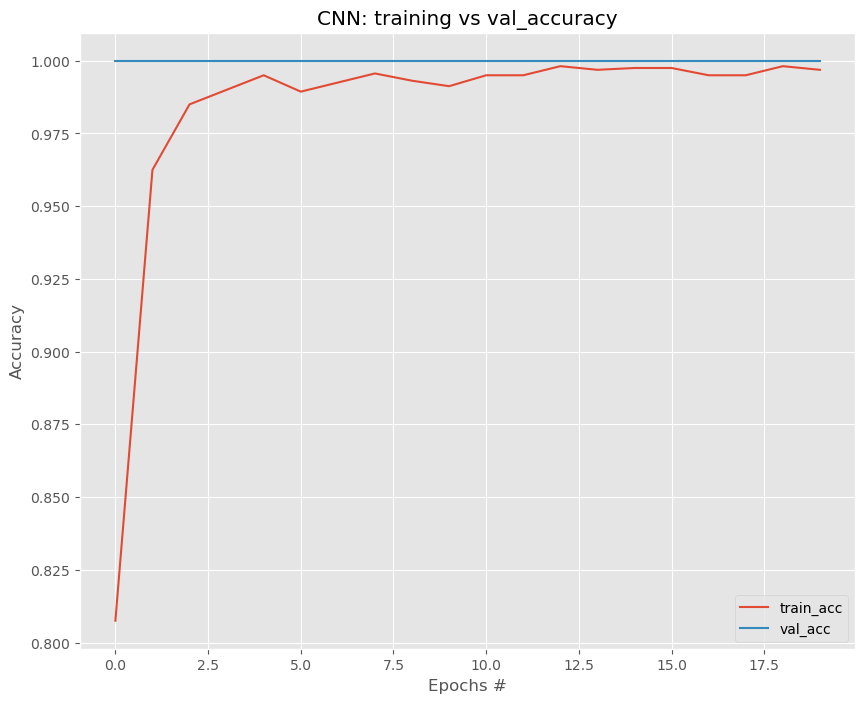

In [26]:
N=np.arange(0,20)
plt.style.use('ggplot')
plt.figure(figsize=[10,8])
plt.plot(N, history.history['accuracy'], label='train_acc')
plt.plot(N, history.history['val_accuracy'], label='val_acc')
plt.title('CNN: training vs val_accuracy')
plt.xlabel('Epochs #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    

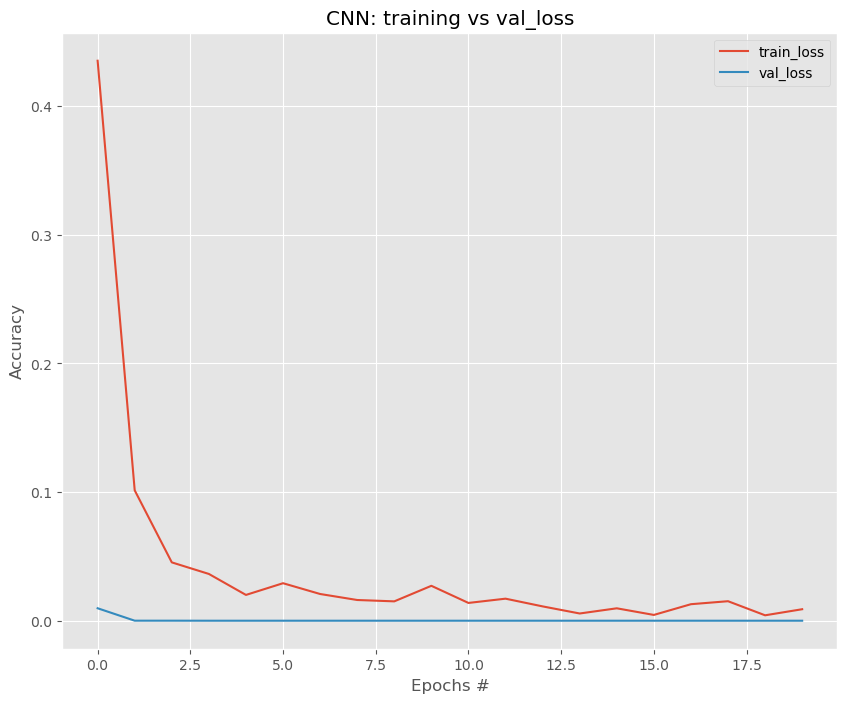

In [27]:
N=np.arange(0,20)
plt.style.use('ggplot')
plt.figure(figsize=[10,8])
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('CNN: training vs val_loss')
plt.xlabel('Epochs #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    

In [28]:
def prediction_image(img):
    import cv2
    import numpy as np
    from PIL import Image

    # Convert PIL image to OpenCV
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    orig = img_cv.copy()

    # Resize & preprocess
    resized = cv2.resize(img_cv, (28, 28))
    resized = resized.astype('float32') / 255.0
    resized = np.expand_dims(resized, axis=0)

    # Predict
    preds = model.predict(resized)[0]
    classes = ['double_top', 'double_bottom']

    result = {cls: round(float(score), 3) for cls, score in zip(classes, preds)}

    # Get top prediction
    top_class = classes[np.argmax(preds)]
    confidence = round(float(np.max(preds)), 3)

    if top_class == 'double_bottom':
        advice = "SELL"
    elif top_class == 'double_top':
        advice = "BUY"
    else:
        advice = "Stay Neutral - Market is sideways"

    result_string = f"Trading Recommendation : {advice}"

    return result_string


In [29]:
image=cv2.resize(image, dsize=(28,28))
image=image.astype('float')/255.0
image=img_to_array(image)
image=np.expand_dims(image, axis=0)

preds=model.predict(image)[0]
result=dict()
result['double_bottom']=round(float(list(preds)[0]),3)
result['double_top']=round(float(list(preds)[1]),3)


print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
{'double_bottom': 0.0, 'double_top': 1.0}


In [30]:
preds

array([4.967224e-08, 1.000000e+00], dtype=float32)

In [31]:
list(preds)

[4.967224e-08, 1.0]

In [32]:
round(float(preds[0]),3)

0.0

# Experiment 

In [34]:
model.save('trading recommendation system.h5')

In [35]:
#!pip install gradio


In [36]:
#!pip install --upgrade typing-extensions


In [37]:
import gradio as gr

In [38]:
gr.Interface(
    fn=prediction_image,
    inputs=gr.Image(width=200, height=200, type='pil'),
    outputs=gr.Label(num_top_classes=2),
    title="Trading Recommendation based on Chart Patterns"
).launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://cb63fbb724e0d037f1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
